C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=2 | Silhouette Score: 0.3355 | Davies-Bouldin Index: 1.2607


C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=3 | Silhouette Score: 0.3579 | Davies-Bouldin Index: 1.0327


C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=4 | Silhouette Score: 0.4040 | Davies-Bouldin Index: 0.9308


C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K=5 | Silhouette Score: 0.4085 | Davies-Bouldin Index: 0.8890


C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


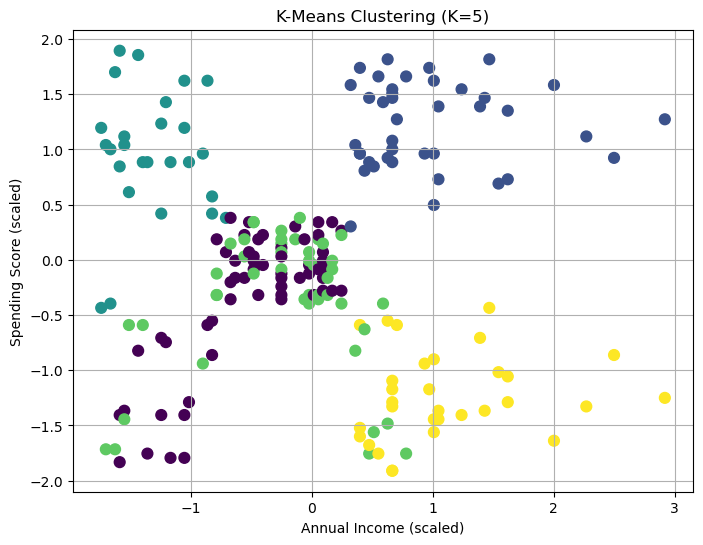


Evaluation Scores:
 K  Silhouette Score  Davies-Bouldin Index
 2          0.335472              1.260682
 3          0.357923              1.032689
 4          0.403958              0.930796
 5          0.408469              0.888969

Analysis:
 The best clustering (K=5) had the highest Silhouette Score of 0.4085.
 It also had one of the lowest Davies-Bouldin scores (0.8890).
 Silhouette Score generally provided more intuitive clustering quality by measuring intra-cluster cohesion and inter-cluster separation.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

data = pd.read_csv("C:\\Users\\Dharani Ravi\\Downloads\\kmeans\\Mall_Customers.csv")
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
silhouette_scores = []
db_scores = []
k_range = range(2, 6)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(scaled_features)
    sil_score = silhouette_score(scaled_features, labels)
    db_score = davies_bouldin_score(scaled_features, labels)
    silhouette_scores.append(sil_score)
    db_scores.append(db_score)
    print(f"K={k} | Silhouette Score: {sil_score:.4f} | Davies-Bouldin Index: {db_score:.4f}")

best_k = k_range[np.argmax(silhouette_scores)]
best_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
cluster_labels = best_kmeans.fit_predict(scaled_features)

plt.figure(figsize=(8,6))
plt.scatter(scaled_features[:, 1], scaled_features[:, 2], c=cluster_labels, cmap='viridis', s=60)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title(f"K-Means Clustering (K={best_k})")
plt.grid(True)
plt.show()

score_df = pd.DataFrame({
    "K": list(k_range),
    "Silhouette Score": silhouette_scores,
    "Davies-Bouldin Index": db_scores
})

print("\nEvaluation Scores:")
print(score_df.to_string(index=False))
best_sil = max(silhouette_scores)
best_db = min(db_scores)

print(f"\nAnalysis:")
print(f" The best clustering (K={best_k}) had the highest Silhouette Score of {best_sil:.4f}.")
print(f" It also had one of the lowest Davies-Bouldin scores ({min(db_scores):.4f}).")
print(" Silhouette Score generally provided more intuitive clustering quality by measuring intra-cluster cohesion and inter-cluster separation.")
